# Iris-Flowers

### Bibliotecas

In [7]:
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

np.random.seed(0)

### Carregar dataset

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

### Shape

In [9]:
dataset.shape

(150, 5)

### Head

In [10]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Tail

In [11]:
dataset.tail(5)

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Descrição

In [12]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### box e whisker plots

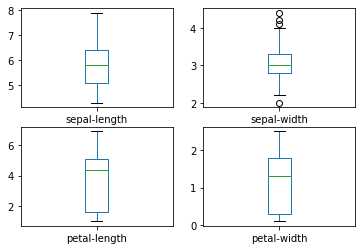

In [13]:
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

### Distribuição

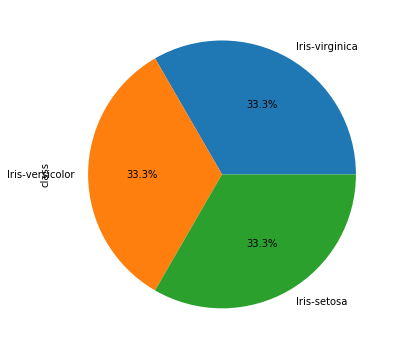

In [24]:
dataset['class'].value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(6,8))

### scatter plot matrix

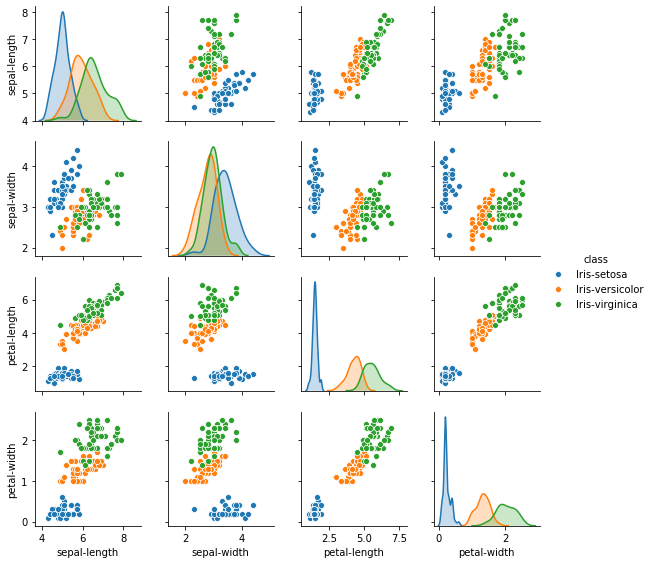

In [15]:
sns.pairplot(dataset, hue="class", size=2)

### Feature Scaling e Divisão do dataset

In [16]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.3
seed = 7
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X) 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_scaled, Y, test_size=validation_size,
                                                                                random_state=seed)

### Métricas de avaliação

In [17]:
seed = 7
scoring = 'accuracy'

## Vamos avaliar 6 algoritmos:

    -Regressão Logística (LR)  Linear simples
    -Linear Discriminant Analysis (LDA)  Linear simples
    -K-Nearest Neighbors (KNN)  não-linear
    -Classification and Regression Trees (CART)  não-linear
    -Gaussian Naive Bayes (NB)  não-linear
    -Support Vector Machines (SVM).

### Array com os modelos de previsão

In [18]:
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()), 
    ('SVM', SVC())
]

### Loop que executa cada modelo

In [19]:
results = []
names = []

def evaluate_each_model_in_turn():
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

### Comparação dos algoritmos

In [20]:
def compare_algorithms():
    fig = plt.figure()
    fig.suptitle('Comparação do algoritmos')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

### Predições no dataset de teste

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('Precisão do KNN:', round(accuracy_score(Y_validation, predictions) * 100), '%\n')
print('Matriz de confusão \n', confusion_matrix(Y_validation, predictions))
print('\n', classification_report(Y_validation, predictions))

Precisão do KNN: 91.0 %

Matriz de confusão 
 [[12  0  0]
 [ 0 16  0]
 [ 0  4 13]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      1.00      0.89        16
 Iris-virginica       1.00      0.76      0.87        17

      micro avg       0.91      0.91      0.91        45
      macro avg       0.93      0.92      0.92        45
   weighted avg       0.93      0.91      0.91        45



LR: 0.894545 (0.081636)
LDA: 0.980000 (0.040000)
KNN: 0.940909 (0.065839)
CART: 0.970000 (0.045826)
NB: 0.980909 (0.038236)
SVM: 0.970909 (0.044499)


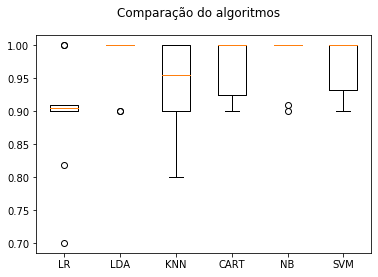

In [22]:
evaluate_each_model_in_turn()
compare_algorithms()